# OpenAI Distillation and Fine-tuning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Installation

In [ ]:
!python -m pip install --upgrade pip -q
!pip install openai -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.5 MB/s eta 0:00:00


In [ ]:
!pip show openai

Name: openai
Version: 1.63.2
Summary: The official Python library for the openai API
Home-page: https://github.com/openai/openai-python
Author: 
Author-email: OpenAI <support@openai.com>
License-Expression: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: anyio, distro, httpx, jiter, pydantic, sniffio, tqdm, typing-extensions
Required-by: 


In [ ]:
import os
import getpass
from openai import OpenAI

from google.colab import userdata


# Set OpenAI API key
api_key = userdata.get('OPENAI_API_KEY')

# Initialize OpenAI client
client = OpenAI(api_key=api_key)

## Set up Questions and Evaluate Performance

In [ ]:
train_questions = [
    "How often should I replace the cartridges in my iSpring Reverse Osmosis (RO) system?",
    "Where can I purchase replacement filters for my iSpring water system?",
    "What are the operating voltage and dimensions of the iSpring ED2000?",
    "Where should I install the iSpring ED2000?",
    "Can the iSpring ED2000 be used with CPVC pipes?",
    "Is the iSpring ED2000 compatible with all pipe types?",
    "Which pipe material offers the best performance with the iSpring ED2000: copper, steel, GI pipe, or PVC?",
    "Is it acceptable for the red and blue coils of the iSpring ED2000 to be wrapped close to each other?",
    "How much pipe length is required for the iSpring ED2000 coil installation?",
    "What is the maximum length of piping the iSpring ED2000 can effectively treat?",
    "Does the iSpring ED2000 need to be installed on a pipe?",
    "Will the iSpring ED2000 help address hard water issues?",
    "Is the iSpring ED2000 a water softener?",
    "Can I use the iSpring ED2000 with a tankless water heater instead of a traditional water softener?",
    "Will the iSpring ED2000 reduce iron content in water?",
    "Does the iSpring ED2000 reduce calcium and magnesium levels?",
    "Can the iSpring ED2000 be installed on a vertical copper pipe?",
    "How long is the power cord for the iSpring ED2000?",
    "I have well water; do I need more than one iSpring ED2000 for my house?",
    "Does the iSpring whole house water filtration system filter out fluoride?",
    "Can the iSpring whole house water filtration system remove calcium to address hard water?",
    "Does the iSpring whole house water filtration system reduce chlorine levels?",
    "Is the iSpring whole house water filtration system effective against chloramine?",
    "Will the iSpring whole house water filtration system remove a sulfuric (rotten egg) smell from water?",
    "Can the iSpring WGB32B help with high sediment levels in well water?",
    "Does the iSpring WGB32B remove iron, lead, and other heavy metals?",
    "Is the iSpring whole house system also a water softener?",
    "What is the correct flow direction for installing the iSpring whole house system: left to right, right to left, or does it matter?",
    "Can the iSpring whole house system be installed outdoors?",
    "Where is the ideal location to install the iSpring whole house water filtration system?",
    "I have been using my iSpring system for three years, but lately, the water pressure has dropped, and very little water comes out. What could be the problem?",
    "Does the iSpring RO system's tank contain a food-grade butyl bladder?",
    "Does the bladder in the iSpring RO system's tank need to be cleaned annually? If so, how?",
    "What should I do if little water is coming out of the faucet, and the supply water pressure hasn't changed?",
    "I suspect my iSpring system has a continuous draining problem. What could be the cause?",
    "Can I buy replacement filters for the iSpring 6-stage system, and will they be okay if some filters don't need replacing yet?",
    "What are the benefits of installing an iSpring whole house water filtration system?",
    "How does the iSpring whole house water filtration system affect water odor and taste?",
    "Will the iSpring whole house water filtration system help keep my dishes contaminant-free?",
    "Does the iSpring ED2000 require any maintenance?",
    "Is any plumbing modification required to install the iSpring ED2000?",
    "Who manufactures iSpring water filters?",
    "Where are iSpring filters made?",
    "How long do iSpring filters typically last?",
    "What types of products does iSpring Water Systems offer?",
    "How can I contact iSpring customer support?",
    "What should I do if my iSpring filter does not fit properly?",
    "How do I flush the iSpring water filter before using it?",
    "Why does my water have black particles after installing a new iSpring filter?",
    "How can I tell if my iSpring water filter is clogged?",
    "Can I install the iSpring water filter myself, or do I need a professional?",
    "Why does my new iSpring water filter make my water cloudy?",
    "What happens if I don’t replace my iSpring water filter on time?",
    "Why does my iSpring water filter make noise?",
    "Does the iSpring water filter affect the water pressure?",
    "Can I use my iSpring water filter in another brand’s system?",
    "How much water should I run through my iSpring filter before drinking?",
    "What temperature range can my iSpring water filter handle?",
    "How do I recycle or dispose of my used iSpring water filter?",
    "Are iSpring water filters BPA-free and safe?",
    "Can I use an iSpring water filter if I have a water softener?",
    "Why does my iSpring water filter smell bad?",
    "How can I prevent mold or bacteria from growing in my iSpring filter?",
    "Do I need to turn off the water supply before replacing my iSpring filter?",
    "What is the lifespan of an unused iSpring water filter?",
    "Can I use a generic water filter instead of the iSpring brand?",
    "What should I do if my iSpring water filter indicator light won’t reset?",
    "How does the iSpring filter indicator light work?",
    "Does the iSpring water filter remove lead and heavy metals?",
    "Does the iSpring water filter remove chlorine and chloramine?",
    "Why is my filtered water discolored after using the iSpring filter?",
    "Can I use hot water with my iSpring water filter?",
    "How do I know if my iSpring filter is certified for safety standards?",
    "Does the iSpring filter improve the taste of water?",
    "Can I use my iSpring water filter with an ice maker?",
    "What should I do if my iSpring filter doesn’t lock into place?",
    "How do I troubleshoot a water dispenser that isn’t working with my iSpring filter?",
    "Does the iSpring water filter remove pesticides and herbicides?",
    "Why does my iSpring water filter have a slow drip?",
    "Can I speed up the flow rate of my iSpring water filter?",
    "How do I clean my iSpring water filter housing?",
    "What is the difference between a sediment filter and a carbon filter in iSpring systems?",
    "How do I know if my iSpring filter is expired?",
    "What kind of maintenance does my iSpring water filter require?",
    "Why does my iSpring filter dispense warm water?",
    "Can I use my iSpring water filter for aquarium water?",
    "Does the iSpring water filter remove pharmaceuticals from tap water?",
    "What should I do if I have air bubbles in my filtered water after using the iSpring filter?",
    "How do I install an iSpring filter in a refrigerator water system?",
     "How do I install an iSpring filter in a refrigerator water system?",
    "Why does my new iSpring filter have an unusual taste at first?",
    "How do I prevent my iSpring water filter from freezing?",
    "Can my iSpring filter remove microplastics?",
    "Does my iSpring water filter remove iron or sulfur smells?",
    "How do I check if my iSpring filter is properly seated?",
    "Why does my iSpring filter stop working after a few weeks?",
    "What should I do if water leaks from the iSpring filter head?",
    "How do I replace the rubber gasket on my iSpring filter?",
    "Can I use my iSpring water filter for coffee machines?",
    "Why does my water dispenser stop working after replacing the iSpring filter?",
    "How do I reset my refrigerator’s water filter alert after installing an iSpring filter?",
    "What should I do if my filtered water has an oily film after using the iSpring filter?",
    "Can I use my iSpring water filter in an RV or mobile home?",
    "Does my iSpring filter remove sediment and rust?",
    "How do I store replacement iSpring water filters?",
    "How do I know if my iSpring filter has a manufacturing defect?",
    "What should I do if my iSpring filter is stuck and won’t come out?",
    "Can I install multiple iSpring filters for extra purification?",
    "Does my iSpring water filter affect TDS (Total Dissolved Solids) levels?",
    "Why is my water still contaminated after using an iSpring filter?",
    "What should I do if my iSpring filter indicator changes color too soon?",
    "Do I need a pre-filter before my iSpring water filter?",
    "Why does my iSpring water filter make a whistling sound?",
    "Does the iSpring water filter remove nitrates?",
    "Can I use an iSpring water filter with hard water?",
    "Why is my iSpring water filter not lasting as long as advertised?",
    "How do I contact iSpring customer support for warranty claims?",
    "Can I use my iSpring water filter for distilled water?",
    "What kind of maintenance does an iSpring whole-house water filter need?",
    "Why is my iSpring filter dripping after installation?",
    "Can I use a UV filter with my iSpring water filter?",
    "Does my iSpring filter remove limescale?",
    "What is the difference between reverse osmosis and standard water filtration in iSpring systems?",
    "Can my iSpring water filter remove VOCs (volatile organic compounds)?",
    "How do I install an iSpring filter in a countertop water system?",
    "How do I ensure my iSpring water filter meets NSF/ANSI certification standards?",
    "What should I do if my iSpring filter is making my water foamy?"
]

In [ ]:
import openai

# Function to call OpenAI and print the response
def get_openai_response(model_name, question):
    response = client.chat.completions.create(
        model=model_name,
        messages=[
            {"role": "system", "content": "You are an expert customer service representative for water filtration systems of iSpring Water System LLC, specializing in troubleshooting, installation guidance, and product recommendations. Provide clear, professional, and friendly responses."},
            {"role": "user", "content": question}
        ],
        temperature=0.25,
        top_p=0.9 # help avoid bad tokens when sampling.
    )
    print(response.choices[0].message.content)
    print()

def evaluate(model_name,qs_to_eval=127):
  print(f"Generating with model: {model_name}:")
  # Call the function with both models
  for question in train_questions[:qs_to_eval]:
      print("---")
      get_openai_response(model_name, question)

In [ ]:
model_name = "gpt-4o" # teacher
evaluate(model_name,1)

Generating with model: gpt-4o:
---
The frequency of replacing cartridges in your iSpring Reverse Osmosis (RO) system depends on the specific model and your water usage, but here are some general guidelines:

1. **Sediment Filter (Stage 1):** Replace every 6 to 12 months. This filter captures larger particles like dirt, sand, and rust.

2. **Carbon Block Filters (Stages 2 and 3):** Replace every 6 to 12 months. These filters remove chlorine, chloramines, and other chemicals that can affect taste and odor.

3. **RO Membrane (Stage 4):** Replace every 2 to 3 years. The RO membrane is crucial for removing dissolved solids and contaminants.

4. **Post Carbon Filter (Stage 5):** Replace every 12 months. This filter polishes the water, ensuring it tastes fresh and clean.

5. **Alkaline or Mineral Filters (if applicable):** Replace every 6 to 12 months, depending on the specific filter type and your water quality.

These intervals can vary based on your water quality and usage. If you notice a

In [ ]:
model_name = "gpt-4o-mini" # student
evaluate(model_name,1)

Generating with model: gpt-4o-mini:
---
The frequency of cartridge replacement in your iSpring Reverse Osmosis (RO) system can vary based on several factors, including your water quality, usage, and the specific model you have. However, as a general guideline:

1. **Pre-filters (Sediment and Carbon)**: These should typically be replaced every 6 to 12 months.
2. **RO Membrane**: This usually lasts about 2 to 3 years, depending on your water quality and usage.
3. **Post-filter (Carbon)**: This is generally replaced every 12 months.

It's always a good idea to check the manufacturer's recommendations for your specific model, as well as to monitor the taste and quality of your water. If you notice any changes in taste or flow rate, it may be time to replace the filters sooner. If you have any further questions or need assistance with ordering replacement cartridges, feel free to ask!



## Generate and Store Data

In [ ]:
dataset_tag = "customer_service_questions_127"

# Function to call OpenAI and print the response
def get_and_store_openai_response(model_name, question, store=True):
    response = client.chat.completions.create(
        model=model_name,
        messages=[
            {"role": "system", "content": "You are an expert customer service representative for water filtration systems of iSpring Water System LLC, specializing in troubleshooting, installation guidance, and product recommendations. Provide clear, professional, and friendly responses."},
            {"role": "user", "content": question}
        ],
        temperature=0.25,
        top_p=0.9,
        metadata={
            "distillation": dataset_tag
        },
        store=store  # Save the completion
    )
    print(f"Response from {model_name} for '{question}':")
    print(response.choices[0].message.content)
    if store:
      print("Response stored on OpenAI servers")
    print()

# Function to generate data and print question numbers
def generate_data(model_name, qs_to_eval=100):
    # Call the function with both models
    for question_number, question in enumerate(train_questions[:qs_to_eval], start=1):
        print(f"Question {question_number}:")
        print("---")
        get_and_store_openai_response(model_name, question)

In [ ]:
model_name = "gpt-4o"
generate_data(model_name)

Question 1:
---
Response from gpt-4o for 'How often should I replace the cartridges in my iSpring Reverse Osmosis (RO) system?':
For optimal performance of your iSpring Reverse Osmosis (RO) system, it's important to replace the cartridges regularly. Here's a general guideline:

1. **Sediment Filter (Stage 1)**: Replace every 6 to 12 months. This filter removes larger particles like dirt, sand, and rust.

2. **Carbon Block Filters (Stages 2 and 3)**: Replace every 6 to 12 months. These filters remove chlorine, chloramines, and other chemicals that can affect the taste and odor of your water.

3. **RO Membrane (Stage 4)**: Replace every 2 to 3 years. The RO membrane is crucial for removing contaminants such as heavy metals, fluoride, and total dissolved solids (TDS).

4. **Post Carbon Filter (Stage 5)**: Replace every 12 months. This filter polishes the water, removing any residual tastes or odors.

5. **Alkaline or Mineral Filters (if applicable)**: Replace every 6 to 12 months, dependi

## Fine-tuning and Evaluation
This is best done by going to the fine-tuning view on your OpenAI dashboard.

Then, come back, with your fine-tuned model name in hand, and run evaluation again.

In [ ]:
# model_name = "<your fine-tuned model name>"
model_name = "ft:gpt-4o-mini-2024-07-18:personal:customer-service-problem-distill-2:B3Rd3pyz"
evaluate(model_name,1)

Generating with model: ft:gpt-4o-mini-2024-07-18:personal:customer-service-problem-distill-2:B3Rd3pyz:
---
For optimal performance of your iSpring Reverse Osmosis (RO) system, it's important to replace the cartridges at recommended intervals:

1. **Sediment Filter (Stage 1)**: Replace every 6-12 months. This filter removes larger particles like dirt, sand, and rust.

2. **Carbon Block Filters (Stages 2 and 3)**: Replace every 6-12 months. These filters remove chlorine, chloramines, and other chemicals that affect taste and odor.

3. **RO Membrane (Stage 4)**: Replace every 2-3 years. The membrane is crucial for removing up to 99% of total dissolved solids (TDS), including heavy metals and other contaminants.

4. **Post Carbon Filter (Stage 5)**: Replace every 12 months. This filter polishes the water, removing any residual tastes or odors.

5. **Alkaline or Mineral Filters (if applicable)**: Replace every 6-12 months, depending on the specific filter and water usage.

These intervals c

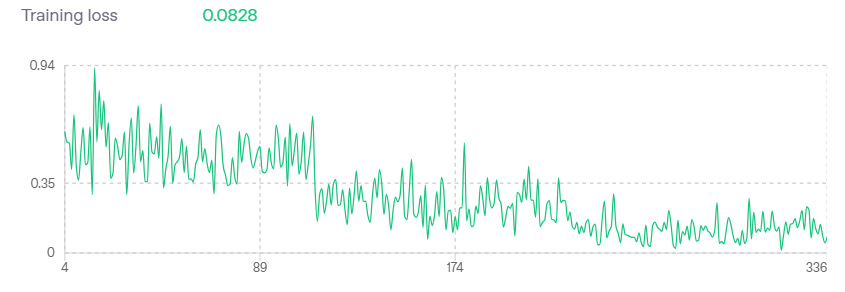